In [132]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<font color="red" size="5">ch010 N차원 배열 다루기</font>
- [numpy](https://numpy.org/doc/stable/)
- [numpy API](https://numpy.org/doc/stable/reference/index.html)
- N차원 배열 객체
- 2차원 배열은 행렬개념
- numpy패키지는 C언어로 구현되어 고성능 수치 계산 패키지
# 1절 넘파이 패키지

In [2]:
import numpy as np
np.__version__

'1.23.5'

In [3]:
#np.arange(from, stop, step) : from부터 stop앞까지 step씩 증감한 정수값을 배열로 생성
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

# 1.1 배열 속성

In [4]:
from numpy import arange
a = arange(15).reshape(3,5) #3행 5열짜리 2차뭔 배열로 return
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [5]:
type(a) #a변수의 타입

numpy.ndarray

In [6]:
a.dtype #a배열 요소의 타입

dtype('int32')

In [7]:
a.dtype.name

'int32'

In [8]:
a.itemsize #한 요소의 bytesize

4

In [9]:
a.ndim #차원수(축수)

2

In [10]:
a.size # 배열 요소의 갯수

15

In [11]:
a.shape #배열의 구조(튜플)

(3, 5)

## 1.2 배열 변경(구조, 타입)

In [12]:
print('구조변경 전', a, sep='\n')
a.shape = (5, 3)
print('구조변경 후', a, sep='\n')

구조변경 전
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
구조변경 후
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [13]:
# 타입변경(x)
a= arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [14]:
a.dtype

dtype('int32')

In [15]:
a.itemsize

4

In [16]:
a.dtype = np.int64
a.dtype

dtype('int64')

In [17]:
a.itemsize

8

In [18]:
a.size, a.shape

(6, (3, 2))

In [19]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [20]:
# 타입변경(O)
a= arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [21]:
a = a.astype(np.int64) #a.astype('int64')와 같음.
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [22]:
a.dtype

dtype('int64')

In [23]:
a.itemsize

8

In [24]:
a.size, a.shape

(12, (3, 4))

In [25]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [26]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [27]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3 배열 저장

In [28]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [29]:
import pickle
with open('data/ch10_a.pkl', 'wb') as f:
    pickle.dump(a,f)

FileNotFoundError: [Errno 2] No such file or directory: 'data/ch10_a.pkl'

In [113]:
with open('data/ch10_a.pkl', 'rb') as f:
    load_a = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'data/ch10_a.pkl'

In [114]:
load_a

NameError: name 'load_a' is not defined

In [115]:
np.all(a == load_a)

NameError: name 'load_a' is not defined

In [79]:
np.save('data/ch10_a.npy',a)

FileNotFoundError: [Errno 2] No such file or directory: 'data/ch10_a.npy'

In [73]:
load _a2 = np.load('data/ch10_a.npy')
np.all(load_a2==a)

SyntaxError: invalid syntax (3664472808.py, line 1)

# 2절. 넘파이 배열
- array()함수 : 다른 파이썬 데이터 구조를 배열로 변환
- arange(), ones(), zeros()

# 2.1 array()함수로 넘파이 배열 만들기
- array(리스트나 튜플, dtype=np.xxx, copy=T/F)

In [83]:
a = np.array([2.1, 4, 6], dtype=np.int8)#정수의 기본 타입은 int32/실수의 기본 타입은 float64
a

array([2, 4, 6], dtype=int8)

In [84]:
a[0], a[1], a[2]

(2, 4, 6)

In [85]:
a.dtype

dtype('int8')

In [87]:
b = np.array([[1.3, 2.4], [4, 5]])
b

array([[1.3, 2.4],
       [4. , 5. ]])

In [88]:
b.dtype

dtype('float64')

In [92]:
b = np.array([[1.3, 2.4], [4, 5]], dtype = np.float32).reshape(1, 4)
b

array([[1.3, 2.4, 4. , 5. ]], dtype=float32)

In [93]:
b.itemsize

4

In [94]:
b.astype(np.float64)

array([[1.29999995, 2.4000001 , 4.        , 5.        ]])

In [96]:
l = [[1, 2], [3.4, 4.5]]
for row in l:
    for data in row:
        print(data, end='\t')
    print()

1	2	
3.4	4.5	


In [100]:
c = np.array([[1,2], [3.4, 4.5]], dtype=np.float16)
for i, row in enumerate(c):
    for j, item in enumerate(row):
        print("{}행 {}열: {}".format(i, j, item), end='\t')
    print()

0행 0열: 1.0	0행 1열: 2.0	
1행 0열: 3.400390625	1행 1열: 4.5	


In [102]:
c = np.array([[1,2,3,4,5], [6,7,8,9,10]], dtype=np.int16)
c

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [103]:
c[0,3]

4

In [110]:
c[:,1:3] #모든행, 1열부터 3열앞까지

array([[2, 3],
       [7, 8]], dtype=int16)

In [111]:
#0행 2열~4열까지
c[0,2:]

array([3, 4, 5], dtype=int16)

In [108]:
#모든행의 맨 마지막 열만 추출
c[:,-1]

array([ 5, 10], dtype=int16)

In [109]:
#모든행의 맨 마지막 열을 제외한 추출
c[:,:-1]

array([[1, 2, 3, 4],
       [6, 7, 8, 9]], dtype=int16)

In [31]:
c = np.array([[1, 2], [3, 4]])
d = np.array(c, copy=True)# d=c.copy() 깊은복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소={}, d주소={}'.format(id(c), id(d)))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[1 2]
 [3 4]]
d=
[[   1    2]
 [3333    4]]
c주소=1808824151536, d주소=1808825389712


## 2.2 기본값이 있는 배열만들기
- np.seros(tup):요소들이 다 0
- np.ones(tup):요소드이 다 1
- np.full(tup, 기본값): 요소들이 다 기본값
- np.empty(tup):요소들이 임의의 값(메모리 상태에 따라 달라짐)
※ 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64, dtype속성 따라 지정 가능

In [33]:
np.zeros((3,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [35]:
x=np.ones((3,5))
x.dtype,x

(dtype('float64'),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]))

In [36]:
np.full((2, 5), -256)

array([[-256, -256, -256, -256, -256],
       [-256, -256, -256, -256, -256]])

In [38]:
np.empty((2,5))

array([[nan,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

## 2.3 랜덤값을 갖는 배열
- np.random.random(tup): 0부터 1미만의 균등분포를 갖는 랜덤값
- np.random.uniform(low=0,high=1.0,size=tup):low부터 high미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0, scale=1.0, size=tup):평균loc과 표준편차scale을 갖는 정규분포 랜덤값
- np.random.rand(n): 균등분포의 1차원 난수 배열 발생(난수n개)
- np.random.randn(n): 표준정규분포(평균0, 표준편차 1인 정규분포)의 1차원 난수 배열 발생(난수 n개)
cf. random.randint(n): 0부터 n미ㅏㅁㄴ의 정수 난수 1개 발생

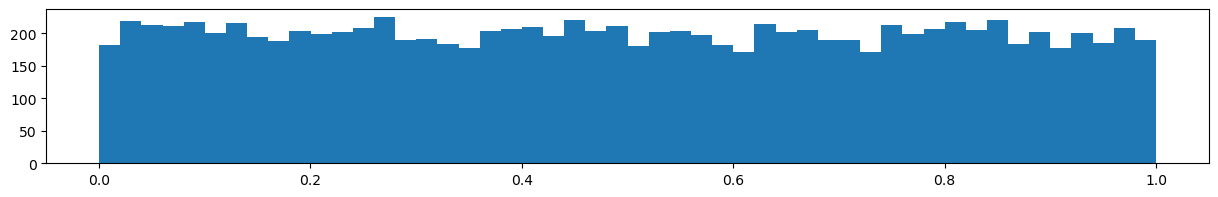

In [43]:
import matplotlib.pyplot as plt
x = np.random.rand(10000)
plt.figure(figsize=(15, 2)) #그래프 크개 figsize=(가로, 세로)
plt.hist(x, bins=50)
plt.show()

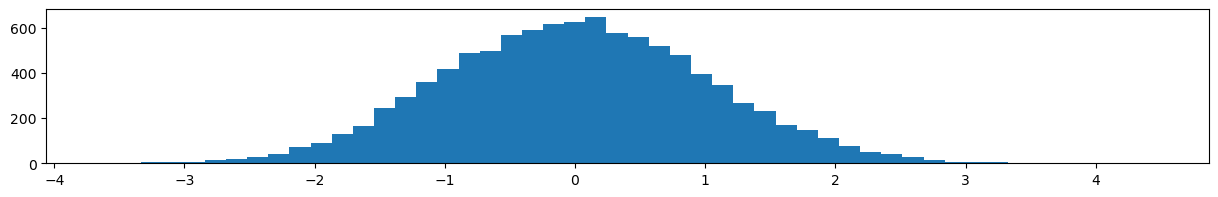

In [44]:
x = np.random.randn(10000)
plt.figure(figsize=(15, 2)) #그래프 크개 figsize=(가로, 세로)
plt.hist(x, bins=50)
plt.show()

In [47]:
#2차원 난수 배열
np.random.seed(12) #seed값을 맞추면 발생되는 난수 순서가 동일
np.random.random((2,5)) #0부터 1미만 난수 배열

array([[0.15416284, 0.7400497 , 0.26331502, 0.53373939, 0.01457496],
       [0.91874701, 0.90071485, 0.03342143, 0.95694934, 0.13720932]])

In [48]:
np.random.uniform(-1, 10, (2, 5)) #-1~10미만의 균등분포 난수 배열

array([[ 2.12211188,  5.66691503,  9.3864765 ,  8.38009095, -0.97514843],
       [ 4.7334863 ,  5.07241397,  4.33915155,  7.44947569,  0.76788428]])

In [49]:
np.random.normal(10, 2, (2, 5)) #평균10, 표준편차 2인 정규분포 난수 배열

array([[12.19191224,  7.5696624 , 12.68471274,  9.75570042, 12.02503095],
       [ 8.17226171,  7.94093959, 12.4195929 , 11.00374461, 10.27769235]])

## 2.4 연속된 값을 갖는 배열 만들기
- np.arange(from, stop, by, dtype): from부터 stop앞까지 by 씩 증감하는 정수 배열
- np.linspace(from, to, count): from부터 to까지(to포함) count개 숫자를 1차원 배열로 생성

In [50]:
np.linspace(0, 2, 20)

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [52]:
#linspace: 많은 수의 점들을 생성
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)

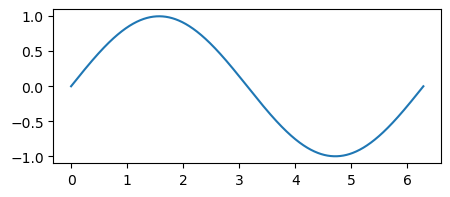

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2))
plt.plot(x,y)
plt.show()

In [55]:
np.linspace(0, 2, 20).reshape(2,10)

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

In [56]:
np.arange(10, 30, 3, dtype=np.int8)

array([10, 13, 16, 19, 22, 25, 28], dtype=int8)

## 2.5 배열의 차원 변경하기
- reshape(면수, 행수, 열수): -1이 올 수도 
- resize(면수, 행수, 열수): -1불가
- T: 전치행렬로 변환
- transpose(): 전치행렬로 변환
※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열 수정됨

In [9]:
a = np.random.random((2, 3))
a

array([[0.58300365, 0.38034934, 0.64125423],
       [0.76682308, 0.71189802, 0.82591553]])

In [10]:
a = np.round(a*10) #round: 반올림/floor:내림/ceil:올림

In [11]:
a.reshape(3, 2)

array([[6., 4.],
       [6., 8.],
       [7., 8.]])

In [12]:
a.reshape(2, -1) #-1이 주어지면 해당 차원의 크기가 자동 계산

array([[6., 4., 6.],
       [8., 7., 8.]])

In [13]:
a.reshape(6,-1)

array([[6.],
       [4.],
       [6.],
       [8.],
       [7.],
       [8.]])

In [14]:
a.resize((2, 3)) #결과를 출력하지 않는 함수를 배열을 바꿈. -1불가

In [15]:
a

array([[6., 4., 6.],
       [8., 7., 8.]])

In [16]:
import seaborn as sns
sns.load_dataset('iris')[::25]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
25,5.0,3.0,1.6,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica
125,7.2,3.2,6.0,1.8,virginica


In [17]:
import numpy as np
a.ravel()

array([6., 4., 6., 8., 7., 8.])

In [18]:
a.T

array([[6., 8.],
       [4., 7.],
       [6., 8.]])

In [19]:
a

array([[6., 4., 6.],
       [8., 7., 8.]])

In [20]:
a.transpose()

array([[6., 8.],
       [4., 7.],
       [6., 8.]])

## 2.6 배열 인쇄

In [22]:
#배열이 커서 출력이 안 될 경우
print(np.arange(10000))

[   0    1    2 ... 9997 9998 9999]


In [23]:
np.arange(10000).reshape(100, 100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [24]:
# 배열 출력 옵션 변경(인쇄할 사이즈를 10000, 최대치, 무한대)
import sys # 최대치 : sys.maxsize
# np.set_printoptions(threshold=1000)
# np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=np.inf)

In [26]:
# np.arange(10000).reshape(100,100)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99],
       [ 100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

## 2.7 기본 연산 동작
### 1) 배열의 요소별 연산

In [29]:
a = np.array([10, 20, 30, 40], dtype=np.int8)
b = np.arange(4)
print(a, a.dtype)
print(b,b.dtype)

[10 20 30 40] int8
[0 1 2 3] int32


In [30]:
a+b

array([10, 21, 32, 43])

In [31]:
c = a+b
c, c.dtype

(array([10, 21, 32, 43]), dtype('int32'))

In [32]:
a += b
a

array([10, 21, 32, 43], dtype=int8)

In [33]:
a = np.array([10, 20, 30, 40], dtype=np.int8)
b = np.arange(4)
print(a, a.dtype)
print(b,b.dtype)

[10 20 30 40] int8
[0 1 2 3] int32


In [34]:
a**b #** 승연산 a의 b승

array([    1,    20,   900, 64000], dtype=int32)

In [37]:
a < 30

array([ True,  True, False, False])

In [38]:
print(a[[ True,  True, False, False]])
print(a[a<30])

[10 20]
[10 20]


In [39]:
print(a)
print(b)
print(a*b)

[10 20 30 40]
[0 1 2 3]
[  0  20  60 120]


### 2) 행렬(2차원 배열)의 곱(@, dot함수) 
cf*(요소별 곱)

In [40]:
a = np.array([[1, 2], [0, 1]])
b = np.array([[2, 0], [3, 4]])
a, b

(array([[1, 2],
        [0, 1]]),
 array([[2, 0],
        [3, 4]]))

In [41]:
a*b

array([[2, 0],
       [0, 4]])

In [42]:
print('요소별 곱 a*b= ', a*b, sep='\n')
print('행렬곱 a@b = ', a@b, sep='\n')
print('행렬곱 a.dot(b) = ', a.dot(b), sep='\n')

요소별 곱 a*b= 
[[2 0]
 [0 4]]
행렬곱 a@b = 
[[8 8]
 [3 4]]
행렬곱 a.dot(b) = 
[[8 8]
 [3 4]]


In [43]:
#2행 2열의 단위행렬: np.eye(n) : A@단위행렬 = A
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 3) 복합 대입연산자 사용
- 배열에서는 a=a+b와 a+=b 다소 다르게 작동

In [44]:
a = np.ones((2, 3), dtype=int) #int32짜리 2행 3열 배열
a

array([[1, 1, 1],
       [1, 1, 1]])

In [46]:
b = np.random.random((2, 3)) # 2행 3열 float64배열
b

array([[0.43217171, 0.51886194, 0.21755668],
       [0.86490915, 0.7250373 , 0.32095921]])

In [47]:
a += b #a+b를 기존 a에 넣는다

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

In [49]:
b += a
b

array([[2.43217171, 2.51886194, 2.21755668],
       [2.86490915, 2.7250373 , 2.32095921]])

In [50]:
a = a+b #a+b를 새로운 변수 a에 할당
a

array([[3.43217171, 3.51886194, 3.21755668],
       [3.86490915, 3.7250373 , 3.32095921]])

### 4) 배열 요소별 집계
- sum, min, max, mean, var(분산), std(표준편차)

In [51]:
a = np.array([[2, 2, 2, 3],
             [4, 3, 2, 1]])
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [52]:
print('전체합: ', np.sum(a), a.sum())

전체합:  19 19


In [54]:
print('전체합: ', np.sum(a), a.sum())
print('전체최소: ', np.min(a), a.min())
print('전체최대: ', np.max(a), a.max())
print('전체평균: ', np.mean(a), a.mean())
print('전체분산: ', np.var(a), a.var())
print('전체표준편차: ', np.std(a), a.std())

전체합:  19 19
전체최소:  1 1
전체최대:  4 4
전체평균:  2.375 2.375
전체분산:  0.734375 0.734375
전체표준편차:  0.8569568250501305 0.8569568250501305


### 4) 배열 축별 집계
- sum, min, max, mean, var(분산), std(표준편차), argmax(최대값의 인덱스)

In [55]:
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [57]:
#axis=1 : 0축을 고정으로 1축들의 합
print('a의 행별 합 :', a.sum(axis=1), np.sum(a,axis=1))

a의 행별 합 : [ 9 10] [ 9 10]


In [58]:
#axis = 0 : 1축을 고정으로 0축(행) 들의 합
print('a의 열별 합 : ', a.sum(axis=0), np.sum(a, axis=0))

a의 열별 합 :  [6 5 4 4] [6 5 4 4]


In [60]:
print('a의 행별 최대값 위치', a.argmax(axis=1), np.argmax(a,axis=1))

a의 행별 최대값 위치 [3 0] [3 0]


In [62]:
#3차원 배열의 축별 집계
b = np.arange(24).reshape(2, 3, 4) #2면 3행 4열
b, b.ndim

(array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],
 
        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]]),
 3)

In [64]:
# axis=0:1축과 2축은 고정하고 0축(0면, 1면)들의 합
b.sum(axis=0), np.sum(b,axis=0)

(array([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]]),
 array([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]]))

In [65]:
#axis=1:0축, 2축은 고정하고 1축(0행, 1행, 2행) 들의 합
b.sum(axis=1)

array([[12, 15, 18, 21],
       [48, 51, 54, 57]])

In [66]:
b.sum(axis=2)

array([[ 6, 22, 38],
       [54, 70, 86]])

## 그외 요소별 계산하는 범용함수들
- 메모리나 시간을 효율적으로 사용할 수 있음
- np.add(A, B, C) : C = np.add(A, B); C=A+B
- np.subtract(A, B, C) : C = np.add(A, B); C=A-B
- np.multiply(A, B, C) : C = np.add(A, B); C=A*B
- np.sqrt(배열) ; 요소별 제곱근 cf. math.sqrt(스칼라값)

In [68]:

a = np.array([1, 2])
b = np.array([3, 4])
c = a + b
c

array([4, 6])

In [70]:
np.add(a, b, c)
c

array([4, 6])

In [72]:
#np.sqrt(배열또는 스칼라값) math.sqrt(스칼라)
a, np.sqrt(a), np.sqrt(4)

(array([1, 2]), array([1.        , 1.41421356]), 2.0)

In [73]:
import math
math.sqrt(4)
math.sqrt(a)

TypeError: only size-1 arrays can be converted to Python scalars

## 2.9 브로드 케이스팅
- 서로 다른 크기의 배열 간 연산을 수행할 수 있도록 해주는 강력한 기능

In [76]:
#1차원 배열
a = np.array([1, 2, 3])
b = 10
print(a + b)
print(np.add(a,b))

[11 12 13]
[11 12 13]


In [77]:
# 브로드캐스팅
a = np.array([1, 2, 3])
b = [10]
print(a + b)
print(np.add(a,b))

[11 12 13]
[11 12 13]


In [78]:
#2차원 배열의 브로드캐스팅
a = np.array([[0, 0, 0],
             [10, 10, 10],
             [20, 20, 20],
             [30, 30, 30]]) #4행 3열
b = np.array([1, 2, 3]) #3열
a+b

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [82]:
#2차원 배열의 브로드캐스팅
a = np.array([[0, 0, 0],
             [10, 10, 10],
             [20, 20, 20],
             [30, 30, 30]]) #4행 3열
b = np.array([[1], 
             [2], 
             [3], 
             [4]]) #4열
a+b

array([[ 1,  1,  1],
       [12, 12, 12],
       [23, 23, 23],
       [34, 34, 34]])

In [84]:
b = np.array([1, 2, 3, 4]) #4열=> (축증가) => 4행 1열
#b_1 = b.reshape(4, 1) #방법1
b_1 = b[:, np.newaxis] #방법2
# np.expand_dims(b, axis=1) #방법3
b_1

array([[1],
       [2],
       [3],
       [4]])

In [85]:
a+b[:, np.newaxis]

array([[ 1,  1,  1],
       [12, 12, 12],
       [23, 23, 23],
       [34, 34, 34]])

In [86]:
#a와 의 모든 쌍의 조합에 대해 계산하고 싶을 때
a=np.array([2, 3, 4, 5])
b=np.array([10, 20, 30, 40])
a+b[:, np.newaxis]

array([[12, 13, 14, 15],
       [22, 23, 24, 25],
       [32, 33, 34, 35],
       [42, 43, 44, 45]])

In [87]:
a[:,np.newaxis]+b

array([[12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])

In [90]:
ax, bx = np.ix_(a,b)
ax+bx

array([[12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])

# 3절. 배열 합치기/분리하기
- 슬라이싱
- 두 배열을 합치는 함수
- r_, c_
- 두배열을 분리하는 함수
## 3.1 인덱싱과 슬라이싱
- 인덱싱에는 없는 인덱스 사용시 에러
- 슬라이싱에는 없는 인덱스 사용시 끝까지 
- 음수 인덱스는 끝에서부터

In [102]:
a = np.arange(10)

In [103]:
a = np.arange(20).reshape(5,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [104]:
a[1:3, 1:3]

array([[ 5,  6],
       [ 9, 10]])

In [94]:
#모든 행의 마지막 열 앞까지 (모든 행 = 모든 0축의 경우 :나 ...을 반드시 명시)
a[:, 0:-1], a[..., :-1]

(array([[ 0,  1,  2],
        [ 4,  5,  6],
        [ 8,  9, 10],
        [12, 13, 14],
        [16, 17, 18]]),
 array([[ 0,  1,  2],
        [ 4,  5,  6],
        [ 8,  9, 10],
        [12, 13, 14],
        [16, 17, 18]]))

In [95]:
#0~1행까지 모든열 추출(모든 열(1축)의 경우 생략 가능 :, ... 사용 가능)
a[0:2, :], a[:2,...], a[:2]

(array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]))

In [105]:
#마지막 행의 데이터를 2차원으로 변경->4행 1열
a[-1][:, np.newaxis], a[-1].reshape(4, -1), np.expand_dims(a[-1], axis=1)

(array([[16],
        [17],
        [18],
        [19]]),
 array([[16],
        [17],
        [18],
        [19]]),
 array([[16],
        [17],
        [18],
        [19]]))

## 3.2 두 배열을 합치는 함수
- **vstack(튜플): 아래로 추가하는 방식**
- **hstack(튜플): 옆으로 추가하는 방식**
- **dstack(튜플): 마지막 축(열)을 쌓아 합침(차원증가)**

In [108]:
a = np.array([1,2,3])
b = np.array([4,5,6])
v = np.array((a,b))
print('vstack 아래로 합치기', v, v.shape, sep='\n')
h = np.hstack((a,b))
print('hstack 옆으로 합치기', h, h.shape, sep='\n')
d = np.dstack((a,b))
print('dstack 축을 depth로 합치기', d, d.shape, sep='\n')

vstack 아래로 합치기
[[1 2 3]
 [4 5 6]]
(2, 3)
hstack 옆으로 합치기
[1 2 3 4 5 6]
(6,)
dstack 축을 depth로 합치기
[[[1 4]
  [2 5]
  [3 6]]]
(1, 3, 2)


In [111]:
c = np.arange(24).reshape(2,3,4)
a, b = c[0], c[1]
a,b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [112]:
np.concatenate((a,b), axis=0) #vstack((a,b))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [113]:
np.concatenate((a,b),axis=1) #hstack((a,b))

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

- **column_stack(tup) : 열단위로 합침**
- **row_stack(tup) : 행단위로 합침 == vstack(tup)**
- **stack(tup, axis) :axis속성에 따라 배열합침. axis음수차원 가능

In [114]:
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.array([7,8,9])
np.column_stack((a,b,c))

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [115]:
np.row_stack((a,b,c))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [117]:
c = np.arange(24).reshape(2, 3, 4)
a, b = c[0], c[1]
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [118]:
np.stack((a,b),axis=0)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [119]:
np.stack((a,b),axis=1) #행(1축)끼리 합쳐서 면을 이룸

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [120]:
np.stack((a,b),axis=-1) #a의 행과 b의 행을 열로 합쳐서 면을 이룸

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

## 3.3 r_, c_

In [121]:
a = np.array([1,2,3,4])
b = np.array([5,5,5,5])
c = np.array([6,6,6,6])
np.r_[a,b,c] #행 합치기

array([1, 2, 3, 4, 5, 5, 5, 5, 6, 6, 6, 6])

In [122]:
np.r_[[a],[b],[c]]

array([[1, 2, 3, 4],
       [5, 5, 5, 5],
       [6, 6, 6, 6]])

In [123]:
np.c_[a,b,c] #컬럼 쌓기

array([[1, 5, 6],
       [2, 5, 6],
       [3, 5, 6],
       [4, 5, 6]])

## 3.4 배열 분리하는 함수
- **vsplit(ary, 정수나 벡터) : 첫번째 축을 따라 분할**
- **hsplit(ary, 정수나 벡터) : 두번째 축을 따라 분할**
- **dsplit(ary, 정수나 벡터) : depth따라 나눔(3차원 이상에서만 동작)
     - 정수 n : n개 분리
     - [n] : n번째 인덱스를 기점으로 분리
     - [m, n] : m번째, n번째 인덱스를 기점으로 분리

In [124]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [125]:
a_vsplit = np.vsplit(a,3) #2개로 분리는 에러
a_vsplit

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [126]:
np.vsplit(a,[2] ) # [2]: 2번 인덱스를 기점으로 분리

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11]])]

In [127]:
np.hsplit(a,2)

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

In [128]:
np.hsplit(a,[2,3]) #[2,3]: 분리될 기준 인덱스

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2],
        [ 6],
        [10]]),
 array([[ 3],
        [ 7],
        [11]])]

- **split(ary, 갯수나 인덱스벡터, axis)**
       - axis=0 : vsplit()동일
       - axis=1 : hsplit()동일
       - axis=2 : 3차원 이상에서만 동작. dsplit()동일
- **array_split(ary, 갯수나 인덱스벡터, axis)**
      -split과의 차이점은 나눠지지 않는 정수로도 사용 가능

In [129]:
a = np.arange(20).reshape(2,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [130]:
np.split(a,2,axis=0) #행분리

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])]

In [131]:
np.split(a,2,axis=1)# 열분리

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [ ]:
np.array_split(a,3, axis=1)